In [8]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [5]:
audio_root = "../data/processed/birdclef-2023/train_embeddings/audio"
! ls {audio_root}/abethr1 | head -n 5

XC128013.mp3
XC128013.wav
XC128013_source0.mp3
XC128013_source1.mp3
XC128013_source2.mp3


In [29]:
from pathlib import Path

# load the sources and show the spectrograms
paths = sorted(Path(mixit_root).glob(f"*/XC207767*.mp3"))
paths

[WindowsPath('../data/processed/birdclef-2023/train_embeddings/audio/reccuc1/XC207767.mp3'),
 WindowsPath('../data/processed/birdclef-2023/train_embeddings/audio/reccuc1/XC207767_source0.mp3'),
 WindowsPath('../data/processed/birdclef-2023/train_embeddings/audio/reccuc1/XC207767_source1.mp3'),
 WindowsPath('../data/processed/birdclef-2023/train_embeddings/audio/reccuc1/XC207767_source2.mp3'),
 WindowsPath('../data/processed/birdclef-2023/train_embeddings/audio/reccuc1/XC207767_source3.mp3')]

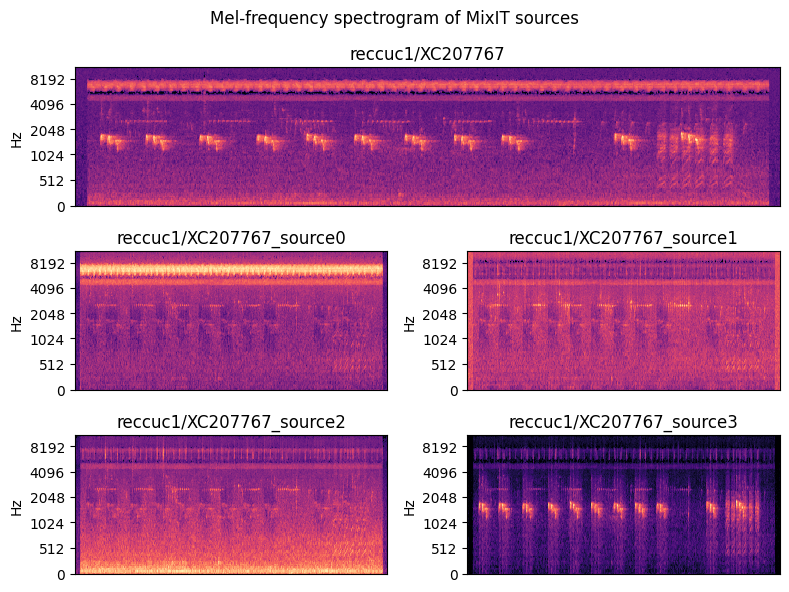

In [33]:
import librosa
import matplotlib.pyplot as plt
import numpy as np


def plot_spectrogram(path, ax):
    y, sr = librosa.load(path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sr, y_axis="mel", ax=ax)
    # plt.colorbar(format="%+2.0f dB")
    ax.set_title(f"{path.parts[-2]}/{path.stem}")


fig, axes = plt.subplot_mosaic("AAAA;BBCC;DDEE", figsize=(8, 6))
plt.suptitle("Mel-frequency spectrogram of MixIT sources")
# disable y ticks
# for ax in axes.values():
#     ax.set_yticks([])
#     ax.set_xticks([])
for ax, path in zip(axes.values(), paths):
    plot_spectrogram(path, ax)

plt.tight_layout()